In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

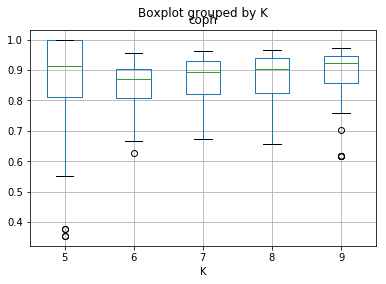

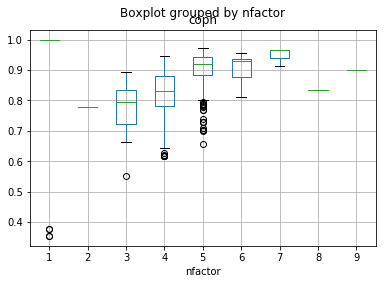

In [2]:
tau = 100
seed = 1
tau_seed_fn = 'tau%d_seed%d' % (tau, seed)

fn = 'simulation/output/%s_choose_paras.txt' % tau_seed_fn
result = pd.read_csv(fn, sep='\t')
result['nfactor'] = [round(x) for x in result['nfactor']]
result.boxplot(by = 'K', column = 'coph')

result.boxplot(by = 'nfactor', column = 'coph')

K7_a10.4_l11


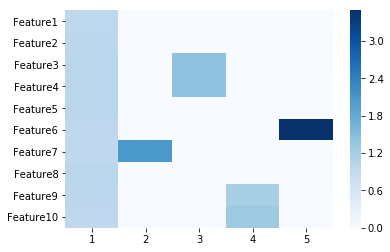

In [3]:
## pick the K with the highest median cophenetic coefficient

res = result[result['nfactor'] >= 5] 
res = res[res['coph'] > 0.9] 
res = res.sort_values('correlation')

i = 0
K = str(int(res.iloc[i]['K']))
a1 = str(res.iloc[i]['alpha1'])
s = a1
a1 = s.rstrip('0').rstrip('.') if '.' in s else s

l1 = str(res.iloc[i]['lambda1'])
s = l1
l1 = s.rstrip('0').rstrip('.') if '.' in s else s
run_idx = int(res.iloc[i]['run_optimal'])

factor = 'K%s_a1%s_l1%s' % (K, a1, l1)
print(factor)

ffn = 'simulation/output/%s/sn_spMF_%s/sn_spMF_FactorMatrix_%s_Run%d.txt' % (tau_seed_fn, factor, factor, run_idx)
fM = pd.read_csv(ffn, sep='\t')

sns.heatmap(fM, cmap = 'Blues')    
plt.show()
plt.close()